In [1]:
import sys

sys.path.append("../libs")

In [2]:
from feature_dataset import FeatureDataset

fs = FeatureDataset("../data/feature_store.db")
df = fs.get_feature_dataset(name="lending_club_cleaned")
df.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,hardship_flag,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,default
0,1077501,5000,5000,36,0.106506,162.87500,10+ years,RENT,24000.0,Verified,...,N,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,N,0.0
1,1077430,2500,2500,60,0.152710,59.84375,< 1 year,RENT,30000.0,Source Verified,...,N,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,N,1.0
2,1077175,2400,2400,36,0.159546,84.31250,10+ years,RENT,12252.0,Not Verified,...,N,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,N,0.0
3,1076863,10000,10000,36,0.134888,339.25000,10+ years,RENT,49200.0,Source Verified,...,N,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,N,0.0
4,1075358,3000,3000,60,0.126953,67.81250,1 year,RENT,80000.0,Source Verified,...,N,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,N,0.0


In [3]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       ...
       'hardship_flag', 'deferral_term', 'hardship_amount', 'hardship_length',
       'hardship_dpd', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'default'],
      dtype='object', length=111)

In [4]:
import featuretools as ft
es = ft.EntitySet(id="loan_data")

In [5]:
es = es.add_dataframe(
    dataframe_name="loans",
    dataframe=df,
)


# Aplicar Deep Feature Synthesis
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="loans",
    trans_primitives=["percentile", "absolute"],  # Transformações matemáticas
    agg_primitives=["mean", "sum", "count", "max", "min", "std"],  # Agregações úteis
    verbose=True
)


/Users/marcos.mota/projects/personal/lending_club/.venv/lib/python3.11/site-packages/featuretools/entityset/entityset.py:1717: UserWarning: Using first column as index. To change this, specify the index parameter
  warnings.warn(
/Users/marcos.mota/projects/personal/lending_club/.venv/lib/python3.11/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Users/marcos.mota/projects/personal/lending_club/.venv/lib/python3.11/site-packages/woodwork/logical_types.py:841: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  series = series.replace(ww.config.get_option("nan_values"), np.nan)
/Users/

Built 304 features
Elapsed: 00:42 | Progress: 100%|██████████


In [6]:
feature_matrix.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,PERCENTILE(tot_coll_amt),PERCENTILE(tot_cur_bal),PERCENTILE(tot_hi_cred_lim),PERCENTILE(total_acc),PERCENTILE(total_bal_ex_mort),PERCENTILE(total_bal_il),PERCENTILE(total_bc_limit),PERCENTILE(total_cu_tl),PERCENTILE(total_il_high_credit_limit),PERCENTILE(total_rev_hi_lim)
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000,5000,36,0.106506,162.87500,10+ years,RENT,24000.0,Verified,Fully Paid,...,0.019904,0.019904,0.019904,0.058251,0.01417,0.245303,0.01417,0.245304,0.019904,0.019904
1077430,2500,2500,60,0.152710,59.84375,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,0.019904,0.019904,0.019904,0.003486,0.01417,0.245303,0.01417,0.245304,0.019904,0.019904
1077175,2400,2400,36,0.159546,84.31250,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,0.019904,0.019904,0.019904,0.078685,0.01417,0.245303,0.01417,0.245304,0.019904,0.019904
1076863,10000,10000,36,0.134888,339.25000,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,0.019904,0.019904,0.019904,0.856810,0.01417,0.245303,0.01417,0.245304,0.019904,0.019904
1075358,3000,3000,60,0.126953,67.81250,1 year,RENT,80000.0,Source Verified,Fully Paid,...,0.019904,0.019904,0.019904,0.870903,0.01417,0.245303,0.01417,0.245304,0.019904,0.019904


In [7]:
feature_matrix = feature_matrix[df['default'].notnull()]
feature_matrix.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,PERCENTILE(tot_coll_amt),PERCENTILE(tot_cur_bal),PERCENTILE(tot_hi_cred_lim),PERCENTILE(total_acc),PERCENTILE(total_bal_ex_mort),PERCENTILE(total_bal_il),PERCENTILE(total_bc_limit),PERCENTILE(total_cu_tl),PERCENTILE(total_il_high_credit_limit),PERCENTILE(total_rev_hi_lim)
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000,5000,36,0.106506,162.87500,10+ years,RENT,24000.0,Verified,Fully Paid,...,0.019904,0.019904,0.019904,0.058251,0.01417,0.245303,0.01417,0.245304,0.019904,0.019904
1077430,2500,2500,60,0.152710,59.84375,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,0.019904,0.019904,0.019904,0.003486,0.01417,0.245303,0.01417,0.245304,0.019904,0.019904
1077175,2400,2400,36,0.159546,84.31250,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,0.019904,0.019904,0.019904,0.078685,0.01417,0.245303,0.01417,0.245304,0.019904,0.019904
1076863,10000,10000,36,0.134888,339.25000,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,0.019904,0.019904,0.019904,0.856810,0.01417,0.245303,0.01417,0.245304,0.019904,0.019904
1075358,3000,3000,60,0.126953,67.81250,1 year,RENT,80000.0,Source Verified,Fully Paid,...,0.019904,0.019904,0.019904,0.870903,0.01417,0.245303,0.01417,0.245304,0.019904,0.019904


In [8]:
from sklearn.model_selection import train_test_split

def split_data(X, y, train_size=0.6, test_size=0.2, val_size=0.2, random_state=42):
    if train_size + test_size + val_size != 1.0:
        raise ValueError("A soma das proporções de treino, teste e validação deve ser igual a 1.0")

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, random_state=random_state)
    test_val_ratio = test_size / (test_size + val_size)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=test_val_ratio, random_state=random_state)

    return X_train, X_test, X_val, y_train, y_test, y_val


In [20]:
X = feature_matrix.drop(columns=['default'])
cat_features = X.select_dtypes(include=['category']).columns
X[cat_features] = X[cat_features].astype(str).fillna('missing')

y = feature_matrix['default']

X_train, X_test, X_val, y_train, y_test, y_val = split_data(X, y, train_size=0.6, test_size=0.2, val_size=0.2)

In [21]:
from catboost import CatBoostClassifier

# Using PRAUC Use Weights False to not inflat the PRAUC metric
baseline_params = {
    'iterations': 1000,
    'auto_class_weights': 'Balanced',
    'eval_metric': 'PRAUC:use_weights=false',
    'cat_features': list(cat_features),
    'verbose': True,
    'random_seed': 55,
    'max_depth': 8,
    'colsample_bylevel': 0.8,
    'subsample': 0.7,
    'learning_rate': 0.02,
    'early_stopping_rounds': 100
}
model = CatBoostClassifier(**baseline_params)

print('Traning the model...')
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100)

print('Evaluating the model...')
y_pred_baseline = model.predict_proba(X_val)[:, 1]

Traning the model...
0:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 649ms	remaining: 10m 48s
1:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (1)	total: 1.14s	remaining: 9m 26s
2:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (1)	total: 1.54s	remaining: 8m 32s
3:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (1)	total: 1.97s	remaining: 8m 11s
4:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (1)	total: 2.44s	remaining: 8m 6s
5:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (5)	total: 2.88s	remaining: 7m 56s
6:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (5)	total: 3.31s	remaining: 7m 50s
7:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (5)	total: 3.72s	remaining: 7m 41s
8:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (8)	total: 4.19s	remaining: 7m 41s
9:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (9)	total: 4.76s	remaining: 7m 51s
10:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (9)	total: 5.22s	remaining: 7m 49s
11:	learn: 1.0000000	

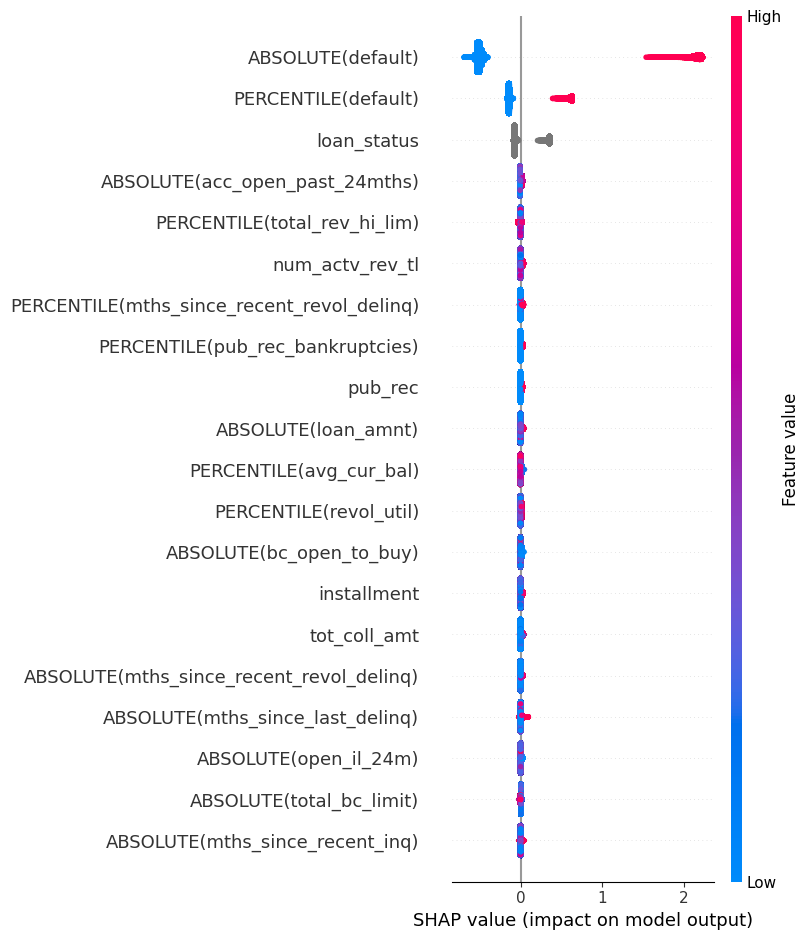

In [24]:
import optuna
import arfs.feature_selection.allrelevant as arfsgroot
import shap

shap_explainer = shap.Explainer(model)
shap_values = shap_explainer(X_val)
shap.summary_plot(shap_values, X_val)

In [25]:
selected_features = None

In [26]:
feat_selection_params = {
    'random_strength': 1,
    'learning_rate': 0.02,
    'max_depth': 8,
    'colsample_bylevel': 0.8,
    'subsample': 0.7,
    'random_seed': 42,
    'auto_class_weights': 'Balanced',
    #'cat_features': cat_features,
    'verbose': False
}


model_for_feat_selection = CatBoostClassifier(**feat_selection_params)

feat_selector = arfsgroot.Leshy(
    model_for_feat_selection, n_estimators=150, verbose=1, max_iter=10, random_state=55, importance="fastshap",
)

feat_selector.fit(X_train.drop(cat_features, axis=1), y_train)

/Users/marcos.mota/projects/personal/lending_club/.venv/lib/python3.11/site-packages/arfs/feature_selection/allrelevant.py:325: UserWarning: fasttreeshap is not installed. Fallback to shap.
  warnings.warn("fasttreeshap is not installed. Fallback to shap.")
/Users/marcos.mota/projects/personal/lending_club/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Leshy iteration: 100%|██████████| 10/10 [10:42<00:00, 64.24s/it]



Leshy finished running using shap var. imp.

Iteration: 	1 / 10
Confirmed: 	32
Tentative: 	45
Rejected: 	216
All relevant predictors selected in 00:10:43.54


Leshy(estimator=<catboost.core.CatBoostClassifier object at 0x85fff8c50>,
      max_iter=10, n_estimators=150,
      random_state=RandomState(MT19937) at 0x54F60B240, verbose=1)

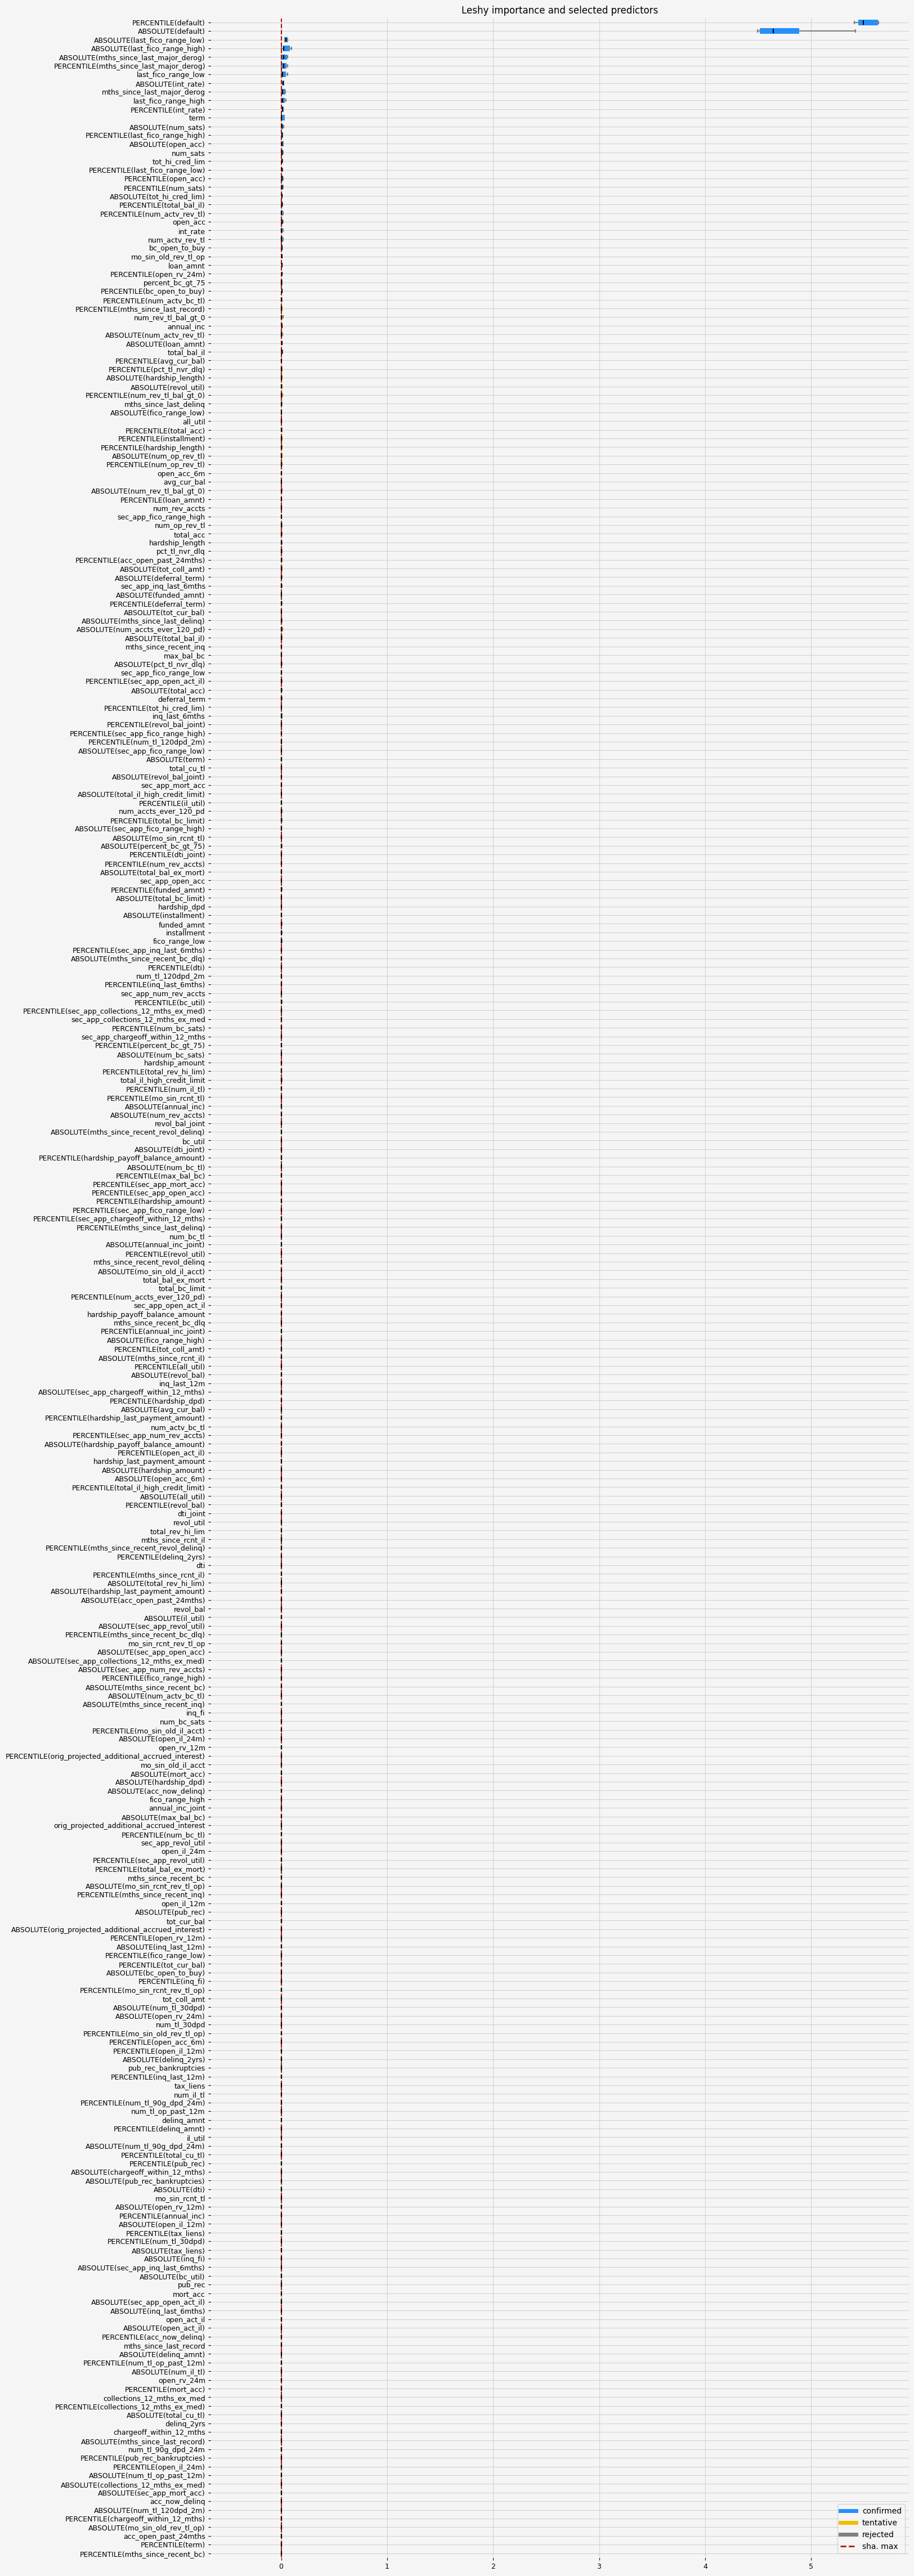

In [27]:
_ = feat_selector.plot_importance()


In [28]:
import json
selected_features = feat_selector.get_feature_names_out().tolist() + cat_features

# Save the selected features
with open('../data/model/selected_features_list.json', 'w') as f:
    json.dump(selected_features, f)

ValueError: operands could not be broadcast together with shapes (32,) (10,) 